#### Sensor Network Simulation 
##### *using consensus based filters*

In [1]:
# Import modules
import os
import settings.input
import settings.initialize

# Reload local modules (for testing)
import imp
imp.reload(settings.input)
imp.reload(settings.initialize)

<module 'settings.initialize' from '/Users/shiraz/repos/sensor-network-sim/settings/initialize.py'>

In [2]:
# Get input files
simulation_file = os.path.join("settings","json_files", "simulation",  "ICF-sim.json")
sensor_network_file = os.path.join("settings","json_files", "sensor_network",  "ICF-sensor-network.json")

# Read input files
raw_data = settings.input.read_configs([simulation_file, sensor_network_file])
input_data  = settings.initialize.do_everything(raw_data)

In [3]:
import sim.target
import sim.network
import sim.history

# Reload local modules (for testing)
import imp
imp.reload(sim.target)
imp.reload(sim.network)
imp.reload(sim.history)

<module 'sim.history' from '/Users/shiraz/repos/sensor-network-sim/sim/history.py'>

Plotted history of target coordinates.
Plotted history of sensor estimates 2.
Showing plot...


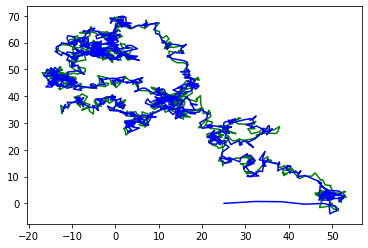

In [4]:
target = sim.target.create(input_data)
network = sim.network.create(input_data)

sim_history = sim.history.create(network)

for t in range(1000):
    sim_history.add_target(target.x)
    
    # Simulation...
    network.make_measurements(target.x)
    
    network.share_info_with_neighbors()
    network.get_info_about_target(target)
    
    network.do_estimations()
    sim_history.add_estimates(network)
    
    target.update()

sim_history.plot_xy(target=True, estimates_of="2")

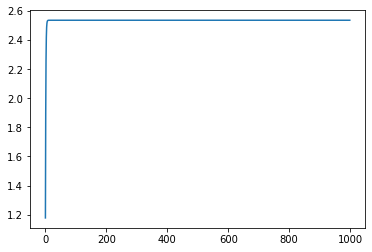

In [5]:
sim_history.plot_timeseries(ErrCov_of="2")

In [6]:
# from sim.noise import Noise
# from matplotlib.pyplot import plot, show
# x = []
# y = []
# for i in range(200):
#     a = Noise([[0.000002,0],[0,0.000002]]).sample()
#     x.append(a[0])
#     y.append(a[1])
    
# plot(x,y, 'ro')
# show()